In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy import spatial
import cv2

In [16]:
with open('data.pkl', 'rb') as fp:
    data = pickle.load(fp)

In [17]:
data.keys()

dict_keys(['head_neck', 'thorax', 'abdomen', 'legs'])

In [18]:
# data['head_neck']

(32, 32)

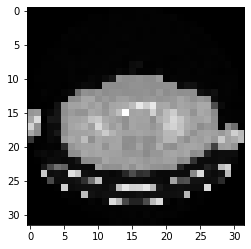

In [19]:
img1 = plt.imread('image_files/1-435.jpg')

img1 = np.average(img1, axis=2)
img1 = cv2.resize(img1, (32, 32))

plt.imshow(img1, cmap='gray')
img1.shape

In [20]:
img1 = img1.flatten()

num_classes = len(data.keys())

max_similarity = {}
average_similarity = {}
for class_name in data.keys():

    imgs = data[class_name]
    num_imgs = len(imgs)

    temp_similarity = []
    for i in range(num_imgs):
        temp_similarity.append(-1 * (spatial.distance.cosine(img1, data[class_name][i].flatten()) - 1))

    max_similarity[class_name] = max(temp_similarity)
    average_similarity[class_name] = np.mean(temp_similarity)



In [21]:
max_similarity

{'head_neck': 0.8334655998395428,
 'thorax': 0.8401316375676766,
 'abdomen': 0.9987272073314409,
 'legs': 0.7789138527384675}

In [22]:
average_similarity

{'head_neck': 0.633444689361857,
 'thorax': 0.7747150171259083,
 'abdomen': 0.8776270454757996,
 'legs': 0.37389417314868284}

In [23]:
# Long-term TODO
# Spear